### Cài đặt

https://www.tensorflow.org/guide/effective_tf2

In [5]:
# !pip3 install tensorflow==2.0.0-rc0

In [1]:
import tensorflow as tf
from tensorflow import keras

### Kiểm tra vesion

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Chú ý:  Nhập command bên dưới vào terminal trong trường hợp không load được dữ liệu về

# /Applications/Python\ 3.7/Install\ Certificates.command

In [7]:
x_train.shape

(60000, 28, 28)

<img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width=400/>

Có thể nhận thấy features là một ma trận 3 chiều tương ứng với 60000 cái ảnh 2 chiều (28 * 28)

In [8]:
y_train.shape

(60000,)

Tương ứng ta có 60000 nhãn với 10 loại từ 0 -> 9 đaị diện cho 10 loại quần áo khác nhau.

In [9]:
min(y_train)

0

In [10]:
max(y_train)

9

| Nhãn | Miêu tả |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Sử dụng dictionary để lưu ánh xạ dữ liệu

In [11]:
labels = {0: "T-shirt/top", 1: "Trouser", 2 : "Pullover", 3:"Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [12]:
labels

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

Nhiệm vụ của chúng ta là phải train được model có thể mappting từ features đến những nhãn này

Ví dụ đây là một feature

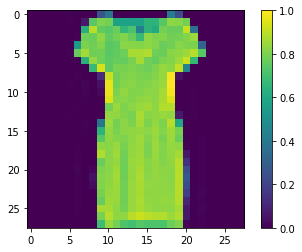

In [13]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()

Với nhãn là:

In [14]:
y_train[20]

3

Theo bảng trên ta có thể thấy đây là một cái váy 3 -> Dress

### Train Model

In [15]:
from tensorflow.keras import Sequential

In [16]:
from tensorflow.keras.layers import Flatten, Dense

1. Khởi tạo một Neural network

In [17]:
model = Sequential()

2. Thêm lớp nhận đầu vào có kích cỡ (28*28)

In [18]:
model.add(Flatten(input_shape = (28, 28)))

Flatten ở đây có nhiệm vụ duỗi ảnh từ ma trận (28 * 28) thành (784 * 1)

3. Thêm một lớp ẩn có cỡ (28 * 1). Hàm phi tuyến ReLU

In [19]:
model.add(Dense(28, activation="relu"))

4. Thêm lớp softmax để thu về đầu ra là 10 lóp như mong muốn

In [20]:
model.add(Dense(10, activation="softmax"))

5. Kiểm tra lại model trước khi train

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 28)                21980     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


6. Loss function: Hàm mất mát thể hiện độ sai lệch dự đoán model với nhãn thực tế

In [22]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metric=['accuracy'])

7. Tiến hành train model trong 10 vòng lặp để tối ưu hoá loss function

In [23]:
model.fit(x_train, y_train, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5608
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4150
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3816
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3644
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3479
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3365
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3263
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3190
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3123
Epoch 10/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3037


8. Kiểm tra độ chính xác hiện tại

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_predicted = model.predict_classes(x_test)

In [29]:
accuracy_score(y_predicted, y_test)

0.8618

Bản chất y_predicted là một vector có chiều bằng y_test. y_predicted bao gồm các nhãn được dự đoán bởi mô hình đã được train. y_test bao gồm các nhãn chính xác của data. Sự so sánh độ tương đồng của 2 vector này thể hiện độ chính xác của mô hình.

<img src="./1.inference.jpg" />

9. Quá trình inference (Truyền data không được train vào mô hình)

In [30]:
x_inference = x_test[0]

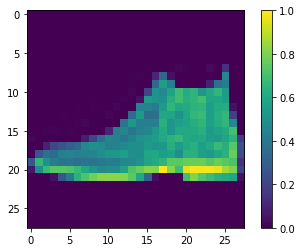

In [31]:
plt.figure()
plt.imshow(x_inference)
plt.colorbar()

In [32]:
y_predicted = model.predict_classes(np.array([x_inference]))

In [33]:
y_predicted[0]

9

In [34]:
labels[y_predicted[0]]

'Ankle boot'

Vậy ta có thể thấy với độ chính xác như trên mô hình có thể dự đoán chính xác được hình ảnh này là một đôi giầy